# Libraries

In [44]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import load_model

# Loading the Data

In [25]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


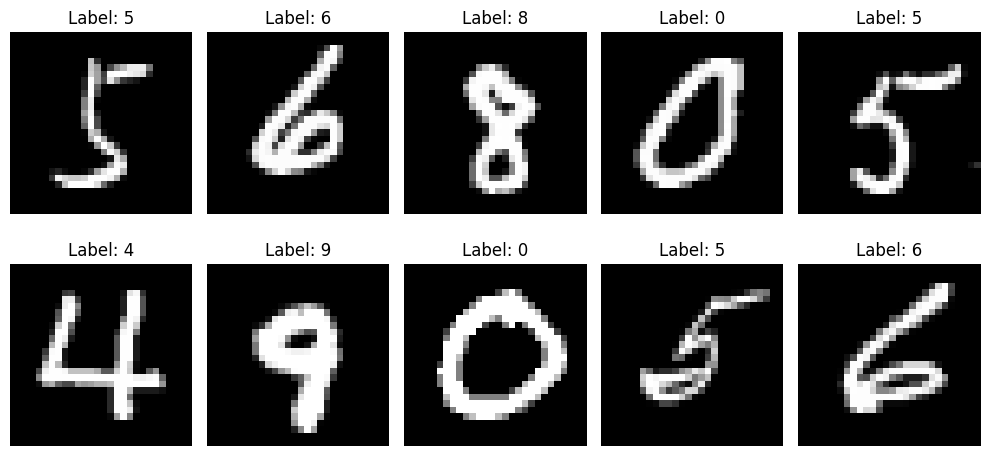

In [26]:
# Randomly select 10 images
random_indices = np.random.choice(x_train.shape[0], 10, replace=False)
images = x_train[random_indices]
labels = y_train[random_indices]

# Plot the images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Pre-Processing

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # reshape the x so that we are able to feed it to the model we feed 28*28*1 tensors then kera unacks this and feeds it to the model
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


1.   Scaling x data and changing data type to float32
2.   Changing the y values into a catagorical vector

*Must run all the previous cells before re-running this cell

In [ ]:
input_shape = (28, 28, 1)
# convert class vectors to binary class matrices
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes) # the raw y array include the lables (a number between 0-9) this code changes it so that each array of y becomes a 10*1 vector representing the probability of each class (1 means it belogs to that class) ex: for "2" we have [0,0,1,0,0,0,0,0,0,0]
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #scales the pixel values to numbers between 0 and 1 scaling usually reduces train time and increases the accuracy in this case we can train on the raw x but we chose not to just to be safe
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10)
y_test shape: (10000, 10)
60000 train samples
10000 test samples


In [ ]:
batch_size = 64 # decreases training time but comes with the cost of accuracy
num_classes = 10
epochs = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape)) 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # This type of pooling selects the maximum value from each patch of the feature map. It effectively captures the most prominent features within each region. For example, if you have a 2x2 patch with values [1, 3, 2, 4], max pooling will select the value 4.
model.add(Dropout(0.25)) # in every update randomly selects 25 percent of the neurons and deactivates them this prevents overfitting 
model.add(Flatten()) # preparess the cnn output for a dense layer reshapes the data from a matrix to a vector while preserving the cnn output
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
# advantages of ReLu : 1) its efficient and easy to calculate 2) migates vanishing gradient problem (during back propagation the deeper we go (first layers) the gradient decrease) relu migates this problem
# 3) ReLU outputs zero for negative inputs, it produces sparse activation. This sparsity makes the network more efficient and less likely to overfit, as fewer neurons are activated simultaneously.
# for the output we need a probability based activation function which outputs a number between 0 and 1 (softmax and sigmoid)


In [ ]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1) #verbose=0 doesnt show anything verbose=1 Displays a progress bar for each epoch (default). verbose=2 Displays one line per epoch without showing the progress bar.
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 119s 124ms/step - accuracy: 0.7483 - loss: 0.7682
Epoch 2/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 112s 119ms/step - accuracy: 0.9142 - loss: 0.2842
Epoch 3/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 121ms/step - accuracy: 0.9220 - loss: 0.2530
Epoch 4/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 122ms/step - accuracy: 0.9266 - loss: 0.2476
Epoch 5/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 139s 119ms/step - accuracy: 0.9301 - loss: 0.2348
Epoch 6/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 119ms/step - accuracy: 0.9283 - loss: 0.2422
Epoch 7/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 119ms/step - accuracy: 0.9307 - loss: 0.2322


The model has successfully trained
Saving the model as mnist.h5


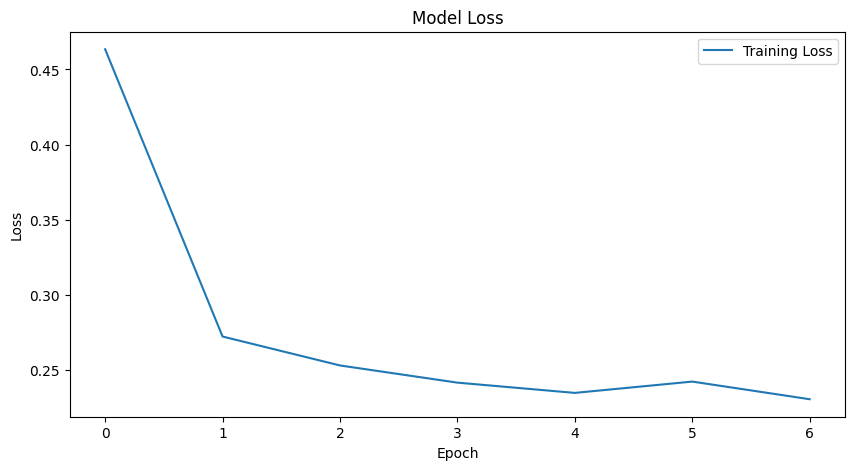

In [ ]:
import matplotlib.pyplot as plt

# Extract loss from hist and plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Training Loss') 
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


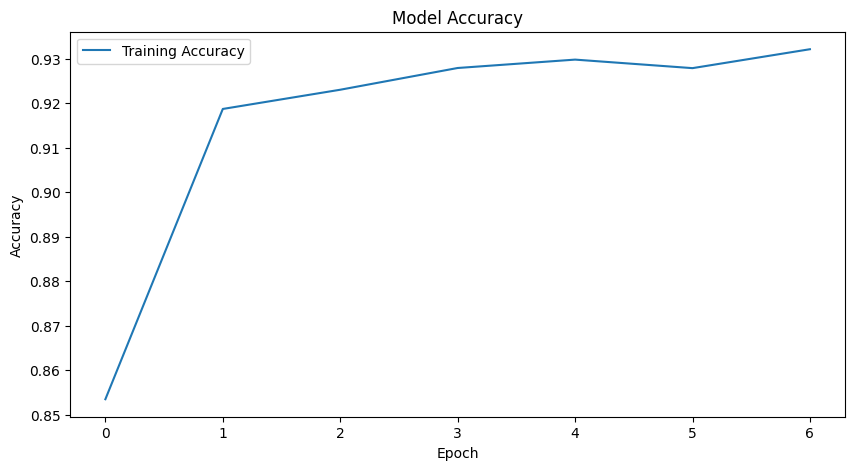

In [ ]:
# Extract accuracy from hist and plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [43]:
model = load_model('mnist.h5')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08963798731565475
Test accuracy: 0.9702000021934509


# Confusion matrix



In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


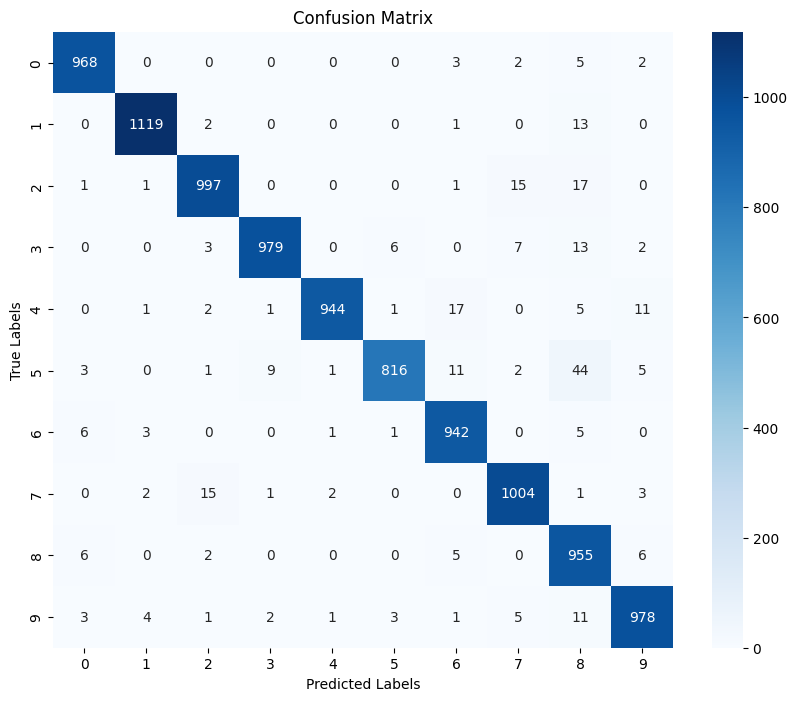

In [ ]:
# A confusion matrix is a tool used to evaluate the performance of a classification algorithm. It provides a detailed breakdown of the algorithm's predictions compared to the actual labels.
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()